In [1]:
import pandas as pd
import glob
txtfiles = []
for file in glob.glob("/Users/jaeheukjung/Documents/Stocks/*.txt"):
    txtfiles.append(file)

In [2]:
import os
import glob
import pandas as pd
os.chdir("/Users/jaeheukjung/Documents/Stocks")

In [3]:
all_filenames = [i for i in glob.glob('*.{}'.format('txt'))]

In [7]:
list_of_df = []

In [8]:
len(all_filenames)

7194

In [5]:
test_df = pd.read_csv(all_filenames[0])
test_df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,12.868,12.982,12.834,12.834,15928,0
1,2005-02-28,13.536,13.536,13.273,13.281,16382,0
2,2005-03-01,13.185,13.299,13.185,13.299,1250,0
3,2005-03-02,13.361,13.395,13.273,13.291,8760,0
4,2005-03-03,13.361,13.404,12.966,13.218,9897,0


In [9]:
def create_df (i):
    my_df = pd.read_csv(all_filenames[i])
    list_of_df.append(my_df)

In [10]:
nanlist = [137,1077, 1150,1905, 2089,2163, 2448, 2507, 2841, 2896, 2977,3196,3345, 3418, 3795, 3979, 4134, 4374, 4459, 4665, 4896, 5334,5839, 5964,6240,6296,6650,6755,6828,7078,7128]

In [11]:
for i in range(0, len(all_filenames)):
    if(i not in nanlist):
        create_df(i)

In [12]:
len(nanlist)

31

In [12]:
len(list_of_df)

7163

In [14]:
sorteddflist= sorted(list_of_df,key=lambda x:x["Volume"].max(axis=0))

In [15]:
len(sorteddflist)

7163

In [16]:
general_companies = sorteddflist[2000:6162]

In [17]:
companies_of_interest = sorteddflist[6163:7163]

In [18]:
companies_of_interest.sort(key=len)

In [19]:
general_companies.sort(key=len)

In [20]:
general_companies = general_companies[1000:4161]

In [21]:
companies_of_interest = companies_of_interest[100:999]

In [22]:
history = []
volume_mean =[]

In [23]:
volume = []

In [24]:
change_list = []

In [25]:
def plot_change(x):
    df = general_companies[x]
    change=0
    for i,j in df.iterrows():
        if (j[1]!=0):
            change = (j[4]-j[1])/j[1]
            change_list.append(change)

In [ ]:
for i in range(0, len(companies_of_interest)):
    plot_change(i)

In [ ]:
for i in range(0, len(companies_of_interest)):
    if(i%100==0):
        print(i)
    plot_change(i)

In [302]:
for i in range(0, len(change_list)):
    change_list[i]= change_list[i]/100

In [297]:
len(change_list)

1200975

In [ ]:
count_p=0
count_n=0
for i in change_list:
    if(i>5):
        count_p = count_p+1
    if(i<-5):
        print(i)
        count_n = count_n+1
print(count_p)
print(count_n)

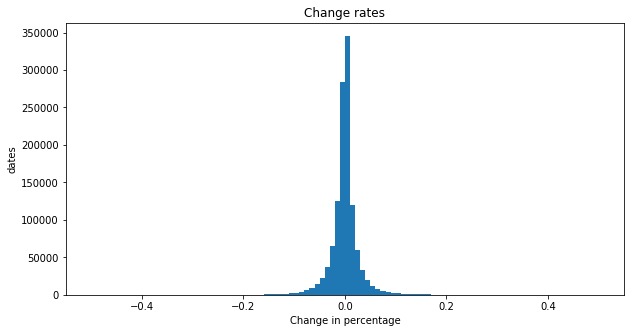

In [325]:
plt.figure(figsize=(10,5))
plt.hist(change_list, bins =100, range=(-.5, .5))
plt.xlabel('Change in percentage')
plt.ylabel('dates')
plt.title('Change rates')
plt.savefig('change graph')

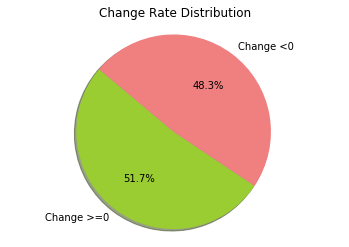

In [328]:
labels = 'Change >=0', 'Change <0'
sizes = [621212,579763]
colors = ['yellowgreen', 'lightcoral']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Change Rate Distribution')

plt.axis('equal')
plt.show()

In [95]:
for i in range(0, len(list_of_df)):
    plot_history(i)

In [97]:
len(volume_mean)

7163

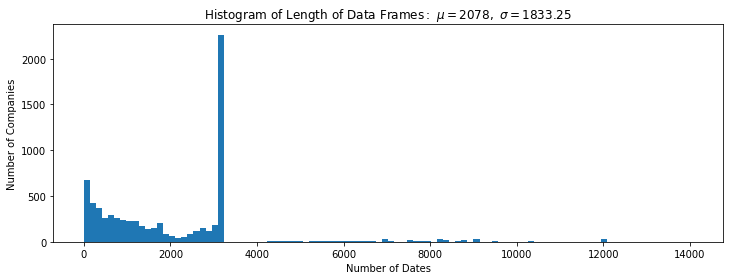

In [254]:
plt.figure(figsize=(12,4))
plt.hist(history, bins=100)
plt.xlabel('Number of Dates')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Length\ of\ Data\ Frames:}\ \mu=2078,\ \sigma=1833.25$')
plt.savefig('all time')

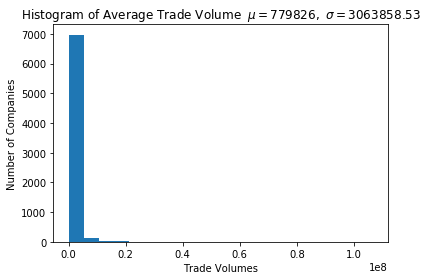

In [253]:
plt.figure(figsize=(6,4))
plt.hist(volume_mean, bins=20)
plt.xlabel('Trade Volumes')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Average\ Trade\ Volume\:}\ \mu=779826,\ \sigma=3063858.53$')
plt.savefig('all volume')

In [201]:
b_hist =[]
s_hist =[]
s_vol =[]

In [210]:
b_vol =[]

In [202]:
def plot_history(x):
    df = general_companies[x]
    sum=0
    for i,j in df.iterrows():
        sum = sum+j[5]
    
    s_hist.append(len(df))
    s_vol.append(sum/len(df))

In [213]:
def big(x):
    df = companies_of_interest[x]
    print(x)
    sum=0
    for i,j in df.iterrows():
        sum = sum+j[5]
    
    b_hist.append(len(df))
    b_vol.append(sum/len(df))

In [ ]:
for i in range(0,len(companies_of_interest)):
    big(i)

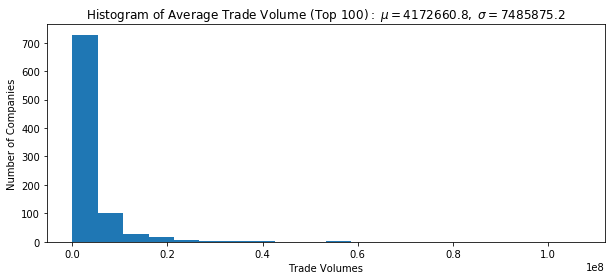

In [252]:
plt.figure(figsize=(10,4))
plt.hist(b_vol, bins=20)
plt.xlabel('Trade Volumes')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Average\ Trade\ Volume\ (Top\ 100):}\ \mu=4172660.8,\ \sigma=7485875.2$')
plt.savefig('top 100 volume_r')

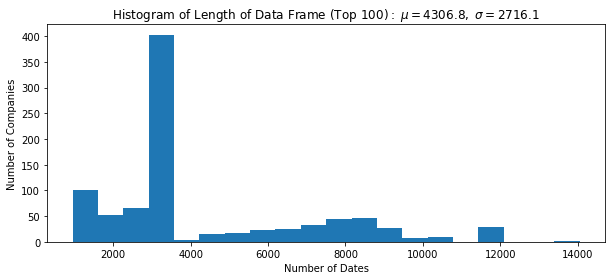

In [251]:
plt.figure(figsize=(10,4))
plt.hist(b_hist, bins=20)
plt.xlabel('Number of Dates')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Length\ of\ Data\ Frame\ (Top\ 100):}\ \mu=4306.8,\ \sigma=2716.1$')
plt.savefig('top 100 volume')

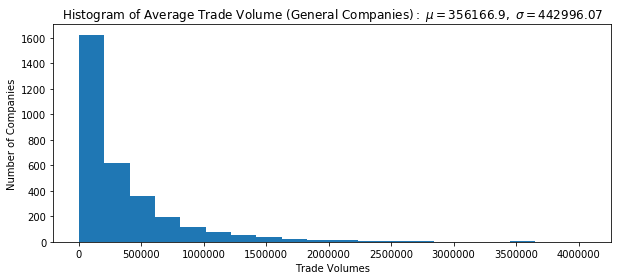

In [249]:
plt.figure(figsize=(10,4))
plt.hist(s_vol, bins=20)
plt.xlabel('Trade Volumes')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Average\ Trade\ Volume\ (General\ Companies):}\ \mu=356166.9,\ \sigma=442996.07$')
plt.savefig('general volume')

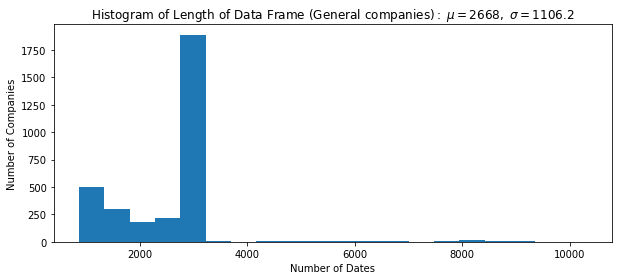

In [255]:
plt.figure(figsize=(10,4))
plt.hist(s_hist, bins=20)
plt.xlabel('Number of Dates')
plt.ylabel('Number of Companies')
plt.title(r'$\mathrm{Histogram\ of\ Length\ of\ Data\ Frame\ (General\ companies):}\ \mu=2668,\ \sigma=1106.2$')
plt.savefig('general date')

In [222]:
import statistics as s
s.median(vo)

3175

In [248]:
s.mean(volume_mean)

779826.325805949

In [235]:
s.stdev(b_vol)

7485875.189914029

(array([6.497e+03, 3.590e+02, 1.170e+02, 6.500e+01, 3.600e+01, 1.600e+01,
        1.400e+01, 1.000e+01, 6.000e+00, 1.200e+01, 3.000e+00, 3.000e+00,
        3.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.02976190e+01, 1.77740010e+06, 3.55475990e+06, 5.33211970e+06,
        7.10947950e+06, 8.88683930e+06, 1.06641991e+07, 1.24415589e+07,
        1.42189187e+07, 1.59962785e+07, 1.77736383e+07, 1.95509981e+07,
        2.13283579e+07, 2.31057177e+07, 2.

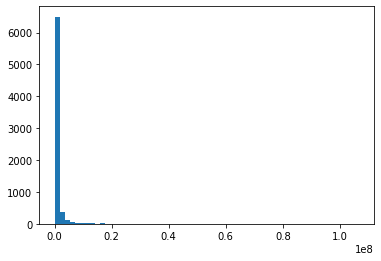

In [121]:
plt.hist(volume_mean, bins = 60)

In [18]:
classification = {}

In [148]:
zipped = tuple(zipped)

In [159]:
import numpy as np
zipped = np.array(zipped)

In [329]:
from scipy import stats 
stats.describe(change_list)

DescribeResult(nobs=1200975, minmax=(-42.08860759493671, 80.48780487804879), mean=0.0004080965118436734, variance=0.04430735114475457, skewness=77.8766796101842, kurtosis=36384.9145119549)

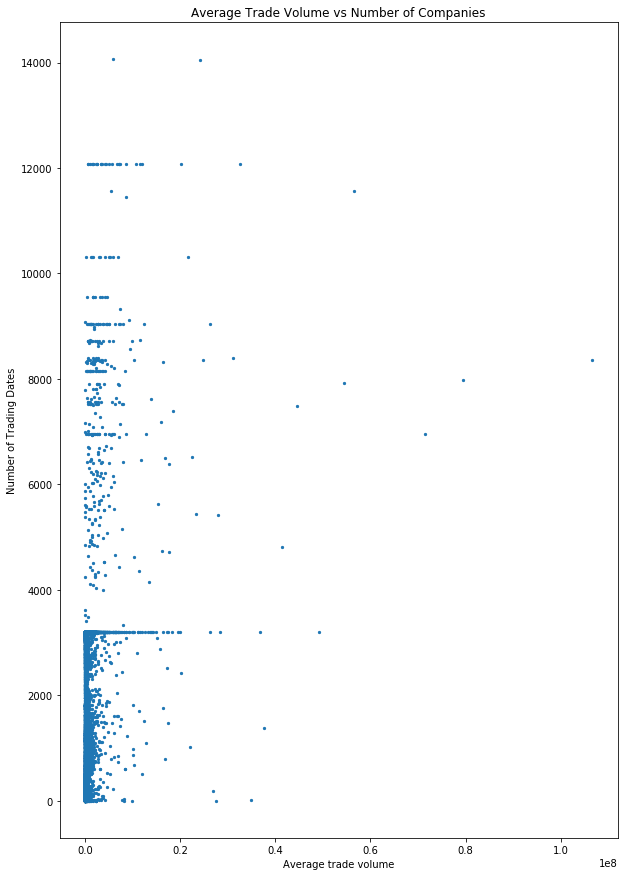

In [296]:
plt.figure(figsize=(10,15))
plt.scatter(volume_mean, history, s=5)
plt.xlabel('Average trade volume')
plt.ylabel('Number of Trading Dates')
plt.title('Average Trade Volume vs Number of Companies')
plt.savefig('overall scatter')

[[2.01156814e+03 4.52918221e+05]
 [5.71745455e+03 5.57100229e+07]
 [4.76652201e+03 1.13574126e+07]]


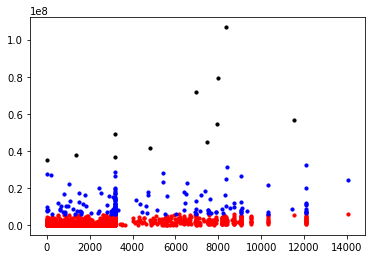

In [164]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
# fit kmeans object to data
kmeans.fit(zipped)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(zipped)

plt.scatter(zipped[y_km ==0,0], zipped[y_km == 0,1], s=10, c='red')
plt.scatter(zipped[y_km ==1,0], zipped[y_km == 1,1], s=10, c='black')
plt.scatter(zipped[y_km ==2,0], zipped[y_km == 2,1], s=10, c='blue')


In [19]:
def relativity (x,y):
    df= companies_of_interest[x]
    df1= general_companies[y]
    changelist = []
    changelist_1 = []
    positive = 0
    negative = 0
    countpos = 0
    countneg = 0
    
    if(len(df1)>200):
        for i, j in df.iterrows():
            if(j[1]!=0):
                change = (j[4]-j[1])/j[1]
                changelist.append((j[0], change))
        for i, j in df1.iterrows():
            if(j[1]!=0):
                change1 = (j[4]-j[1])/j[1]
                changelist_1.append((j[0], change1))
    
        for c in changelist:
            date, change = c
            for c1 in changelist_1:
                date1, change1 = c1
                if(date == date1):
                    if((change >0) & (change1>0)):
                        classification.update({date:1})
                        positive= positive+compare(change,change1)
                        countpos= countpos+1
                    if((change <0) & (change1<0)):
                        classification.update({date:1})
                        positive= positive+compare(change,change1)
                        countpos= countpos+1
                    if((change>0) & (change1<0)):
                        classification.update({date:-1})
                        negative= negative-compare(change,change1)
                        countneg = countneg+1
                    if((change<0) & (change1>0)):
                        classification.update({date:-1})
                        negative= negative-compare(change,change1)
                        countneg = countneg+1
        if((positive/negative)>1.30):
            correlated_companies.append([x,y])
        if((positive/negative)<.7):
            correlated_companies.append([x,y])
        if(negative!=0):
            return (positive/negative)
        else: 
            return 0
    else: 
        return 0

In [20]:
correlated_companies = []

In [21]:
def compare(x,y):
    if(x>y):
        if(x!=0):
            return y/x
        if(x==0):
            return 0
    if(y>x):
        if(y!=0):
            return x/y
        if(y==0):
            return 0
    if(x==y):
        return 1

In [ ]:
import random
count = 0
for i in range(0,7):
    x= random.randint(0,200)
    count= count+1
    print(count)
    for j in range(0, 150):
        y= random.randint(0,1000)
        relativity(x,y)

In [23]:
len(correlated_companies)

314

In [ ]:
correlated_companies

In [ ]:
count = 0
x = []
for i in range(0, len(correlated_companies)):
    if(i<len(correlated_companies)-1):
        if (correlated_companies[i][0]==correlated_companies[i+1][0]):
            count = count+1
        elif(correlated_companies[i][0]!=correlated_companies[i+1][0]):
            company = correlated_companies[i][0]
            number = count
            x.append(company)
            x.append(count)
            print(x)
            count = 0
            x.clear()
    else:
        company = correlated_companies[i][0]
        number = count
        x.append(company)
        x.append(count)
        print(x)


In [36]:
import matplotlib.pyplot as plt
def plot (x,y):
    df= x
    df1=y
    closelist = []
    closelist_1 = []
    for i, j in df.iterrows(): 
        close = j[4]
        closelist.append(close)
    for i, j in df1.iterrows():
        close1 = j[4]
        closelist_1.append(close1)
    plt.plot(range(0,len(closelist)), closelist)
    plt.plot(range(0,len(closelist_1)), closelist_1)

In [764]:
list_attributes = []
attributes = []
for i in correlated_companies:
    list_attributes = i
    if(list_attributes[0]==98):
        attributes.append(list_attributes[1])

In [765]:
attributes.sort(reverse=True)

In [766]:
attributes = attributes[0: 20]

In [670]:
dates = []
attribute_dates =[]
all_dates = []
df_new = companies_of_interest[21]
for i,j in df_new.iterrows():
    dates.append(j[0])

for x in attributes:
    temp_dates =[]
    for i,j in general_companies[x].iterrows():
        temp_dates.append(j[0])
        all_dates.append(j[0])
    attribute_dates.append(temp_dates)

In [671]:
for x in dates:
    if (x not in all_dates):
        dates.remove(x)

In [672]:
a_dates =[]
for x in attribute_dates:
    a_dates = x
    for y in x:
        if(y not in dates):
            x.remove(y)

In [563]:
attribute_dates.sort(key=len)

In [564]:
get_classification = []

In [ ]:
attributes

In [566]:
for i in attributes:
    len_list.append(len(general_companies[i]))

In [567]:
len_list = []

In [675]:
get_classification[:]=[]

In [676]:
def classification_data(x):
    changelist = []
    df = companies_of_interest[x]
    for i, j in df.iterrows():
        if(j[0] in dates):
            if(j[1]!=0):
                change = (j[4]-j[1])/j[1]
                if( change>=0):
                    get_classification.append(1)
                if(change<0):
                    get_classification.append(0)

In [696]:
classification_data(21)

In [385]:
def get_changerate (x):
    temp_list_of_dicts[:]=[]
    get_change = []
    get_dates = []
    df = general_companies[x]
    for i, j in df.iterrows():
         get_dates.append(j[0])
    for date in dates:
        if(date in get_dates):
            Open = df.loc[df['Date']==date]['Open'].values
            open = Open[0]
            Close = df.loc[df['Date']==date]['Close'].values
            close = Close[0]
            change = ((close-open)/open)
            temp_list_of_dicts.append(change)
        else : 
            temp_list_of_dicts.append(0)
        
    return temp_list_of_dicts
                #if in the bigger date list, get the change rate in. if in the bigger list but not here, put 0.
                #if in the smaller list, but not in bigger list, no value.

In [575]:
temp_list_of_dicts[:]=[]

In [374]:
for i in range(0, len(attributes)):
    get_changerate(i)

In [ ]:
row = (general_companies[192].loc[general_companies[192]['Date']=='2016-05-23']['Open']).values
a = row[0]
print(a)

In [689]:
dataframe = pd.DataFrame(columns = attributes, index = dates)

In [589]:
attributes.remove(711)

In [386]:
def insert_into_df (x):
    dataframe[x]=get_changerate(x)

In [ ]:
for i in attributes:
    print(i)
    insert_into_df(i)

In [688]:
dataframe = dataframe.iloc[0:0]

In [684]:
attributes.remove(874)
attributes.remove(755)

In [692]:
dataframe.insert(18,'classification',0)

In [697]:
dataframe['classification']=get_classification

In [698]:
dataframe_reduced = dataframe.drop(dataframe.index[0:1000])

In [699]:
dataframe_reduced.head()

,960,948,938,937,920,916,887,874,874,872,845,755,730,676,628,625,570,533,classification
2013-07-25,0.009822,-0.016566,-0.033333,-0.022076,-0.011778,-0.002048,0.016701,-0.046512,-0.046512,0.000969,-0.006033,0.021401,-0.000528,0.037900,0.009511,0.020690,0.019005,0.017570,0
2013-07-26,0.004905,-0.057956,0.000000,0.000000,-0.016678,-0.001711,-0.006186,0.000000,0.000000,-0.005528,0.002387,-0.014166,-0.000907,-0.007066,0.002755,-0.025316,0.002034,-0.029787,1
2013-07-29,-0.007299,0.000000,-0.147059,0.007821,0.000000,-0.007922,-0.026971,0.032258,0.032258,-0.008447,-0.001884,-0.015043,-0.004149,-0.024127,0.012030,0.060544,0.013417,0.007331,0
2013-07-30,-0.008563,-0.066667,0.000000,0.003061,-0.002421,-0.018287,0.004219,0.023622,0.023622,-0.009499,-0.010772,-0.023087,-0.005278,-0.013269,0.008004,-0.076923,0.008106,-0.021739,0
2013-07-31,-0.004938,0.003934,0.034126,-0.010407,-0.007207,0.009290,-0.035491,0.007874,0.007874,-0.012574,0.002861,0.028302,-0.003096,-0.025058,-0.050231,-0.021196,0.017594,0.014815,1


In [732]:
X = dataframe_reduced.iloc[:, 1:18]
y = dataframe_reduced.iloc[:, 18]

In [733]:
X = X.values
y = y.values

In [826]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [800]:
import keras

In [801]:
from keras.models import Sequential
from keras.layers import Dense

In [813]:
classifier = Sequential()

In [814]:
classifier.add(Dense(activation = 'relu', input_dim = 17, units = 10, kernel_initializer = 'uniform'))

In [815]:
classifier.add(Dense(activation = 'relu', units = 11, kernel_initializer = 'uniform'))

In [816]:
classifier.add(Dense(activation = 'relu', units = 12, kernel_initializer = 'uniform'))

In [817]:
classifier.add(Dense(activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

In [818]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Epoch 1/200
1030/1030 [==============================] - 0s 264us/step - loss: 0.6920 - accuracy: 0.5583
Epoch 2/200
1030/1030 [==============================] - 0s 92us/step - loss: 0.6901 - accuracy: 0.5592
Epoch 3/200
1030/1030 [==============================] - 0s 87us/step - loss: 0.6887 - accuracy: 0.5592
Epoch 4/200
1030/1030 [==============================] - 0s 91us/step - loss: 0.6874 - accuracy: 0.5592
Epoch 5/200
1030/1030 [==============================] - 0s 88us/step - loss: 0.6867 - accuracy: 0.5592
Epoch 6/200
1030/1030 [==============================] - 0s 89us/step - loss: 0.6858 - accuracy: 0.5592
Epoch 7/200
1030/1030 [==============================] - 0s 87us/step - loss: 0.6851 - accuracy: 0.5592
Epoch 8/200
1030/1030 [==============================] - 0s 108us/step - loss: 0.6843 - accuracy: 0.5592
Epoch 9/200
1030/1030 [==============================] - 0s 94us/step - loss: 0.6830 - accuracy: 0.5592
Epoch 10/200
1030/1030 [==============================] - 0s 9

1030/1030 [==============================] - 0s 93us/step - loss: 0.6438 - accuracy: 0.5961
Epoch 156/200
1030/1030 [==============================] - 0s 95us/step - loss: 0.6430 - accuracy: 0.6087
Epoch 157/200
1030/1030 [==============================] - 0s 93us/step - loss: 0.6428 - accuracy: 0.6068
Epoch 158/200
1030/1030 [==============================] - 0s 96us/step - loss: 0.6423 - accuracy: 0.6146
Epoch 159/200
1030/1030 [==============================] - 0s 94us/step - loss: 0.6432 - accuracy: 0.6058
Epoch 160/200
1030/1030 [==============================] - 0s 95us/step - loss: 0.6430 - accuracy: 0.6049
Epoch 161/200
1030/1030 [==============================] - 0s 92us/step - loss: 0.6428 - accuracy: 0.6058
Epoch 162/200
1030/1030 [==============================] - 0s 92us/step - loss: 0.6430 - accuracy: 0.6029
Epoch 163/200
1030/1030 [==============================] - 0s 93us/step - loss: 0.6426 - accuracy: 0.6068
Epoch 164/200
1030/1030 [==============================] - 0

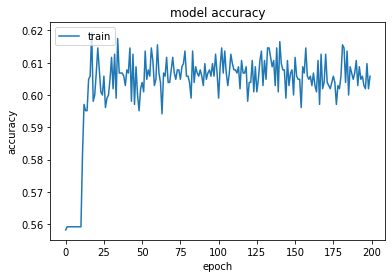

In [819]:
history = classifier.fit(X_train, y_train, epochs=200, batch_size=10)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [827]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

/Users/jaeheukjung/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [823]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [830]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=15)

In [831]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[95 22]
 [68 32]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.58      0.81      0.68       117
           1       0.59      0.32      0.42       100

    accuracy                           0.59       217
   macro avg       0.59      0.57      0.55       217
weighted avg       0.59      0.59      0.56       217



=== All AUC Scores ===
[0.53424658 0.45205479 0.50684932 0.60273973 0.61643836 0.61111111
 0.65277778 0.58333333 0.66666667 0.58333333 0.55555556 0.66666667
 0.625      0.51388889 0.54166667]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.5808219178082191
